# Traffic accident rates

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the Data

In [2]:
data = pd.read_csv('traffic_accidents.csv')

# Let's explore the top 5 rows of the dataframe
data.head()

,Accident_Index,Status,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Time,st_Road_Class,st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,nd_Road_Class,nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards
0,201997GP00101,Unvalidated,258811,665001,97,3,1,1,03-01-19,0:01,1,1,2,30.0,3,2,2,2,0,1,4,1,1,0,0
1,2.01947E+12,Unvalidated,579433,114741,47,3,2,1,03-03-19,0:01,1,1,6,50.0,0,0,2,2,0,0,6,1,1,0,0
2,2.01947E+12,Unvalidated,589981,114280,47,3,2,1,14-05-19,0:01,1,1,6,60.0,0,0,2,2,0,0,1,1,1,0,0
3,2.01911E+12,Unvalidated,408384,548387,11,3,2,1,25-05-19,0:01,1,1,6,60.0,3,4,2,2,0,0,1,1,2,0,0
4,2.01947E+12,Unvalidated,517157,137375,47,2,2,1,07-03-19,0:01,1,1,3,50.0,0,0,2,2,0,0,1,1,1,0,0


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include='all')

,Accident_Index,Status,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Time,st_Road_Class,st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,nd_Road_Class,nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards
count,46747,46747,46747.000000,4.674700e+04,46747.000000,46747.000000,46747.000000,46747.000000,46747,46747,46747.0,46747.0,46747.000000,46543.000000,46747.000000,46747.000000,46747.0,46747.0,46747.000000,46747.000000,46747.000000,46747.000000,46747.000000,46747.000000,46747.000000
unique,6950,1,NaN,NaN,NaN,NaN,NaN,NaN,181,1426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.01901E+12,Unvalidated,NaN,NaN,NaN,NaN,NaN,NaN,22-01-19,18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3494,46747,NaN,NaN,NaN,NaN,NaN,NaN,436,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,435938.207928,2.959148e+05,33.259953,2.762081,1.844289,1.319614,NaN,NaN,1.0,1.0,5.246091,38.127409,2.216121,1.943868,2.0,2.0,0.010054,0.757311,1.972041,1.590861,1.272360,0.079984,0.050741
std,NaN,NaN,100484.906493,1.592696e+05,23.891744,0.463161,0.722321,0.756179,NaN,NaN,0.0,0.0,1.638244,14.566392,2.702499,1.916098,0.0,0.0,0.228245,1.891902,1.706233,1.745626,0.592208,0.646333,0.537230
min,NaN,NaN,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.0,1.0,-1.000000,0.000000,-1.000000,-1.000000,2.0,2.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,NaN,NaN,368528.000000,1.742560e+05,13.000000,3.000000,1.000000,1.000000,NaN,NaN,1.0,1.0,6.000000,30.000000,0.000000,0.000000,2.0,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,436360.000000,2.760230e+05,34.000000,3.000000,2.000000,1.000000,NaN,NaN,1.0,1.0,6.000000,30.000000,1.000000,2.000000,2.0,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,517631.500000,3.972395e+05,46.000000,3.000000,2.000000,1.000000,NaN,NaN,1.0,1.0,6.000000,50.000000,3.000000,4.000000,2.0,2.0,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000


### Variables we will be using such as Date and Time does not consist of any missing values. 
### Therefore there is no requirement to remove any rows with missing values
### However we need to convert variable Date and Time to something useful for us to visualize

In [4]:
#Create a new column for hour as an integer
data['TimeStr'] = data['Time'].astype("str")
data['Hour'] = data['TimeStr']
data['Hour'] = data['Hour'].str.split(":",expand=True)
data['Hour'] = data['Hour'].astype(int)

#Create a new column showing the name of the month
data['Day of Week'] = pd.to_datetime(data['Date'], format='%d-%m-%y').dt.weekday_name
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Month'] = data['Month'].astype(int)
data['Month Name'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

#relook at first 5 row of dataframe to ensure new columns are added
data.head()

,Accident_Index,Status,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Time,st_Road_Class,st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,nd_Road_Class,nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,TimeStr,Hour,Day of Week,Month,Month Name
0,201997GP00101,Unvalidated,258811,665001,97,3,1,1,03-01-19,0:01,1,1,2,30.0,3,2,2,2,0,1,4,1,1,0,0,0:01,0,Thursday,3,Mar
1,2.01947E+12,Unvalidated,579433,114741,47,3,2,1,03-03-19,0:01,1,1,6,50.0,0,0,2,2,0,0,6,1,1,0,0,0:01,0,Sunday,3,Mar
2,2.01947E+12,Unvalidated,589981,114280,47,3,2,1,14-05-19,0:01,1,1,6,60.0,0,0,2,2,0,0,1,1,1,0,0,0:01,0,Tuesday,5,May
3,2.01911E+12,Unvalidated,408384,548387,11,3,2,1,25-05-19,0:01,1,1,6,60.0,3,4,2,2,0,0,1,1,2,0,0,0:01,0,Saturday,5,May
4,2.01947E+12,Unvalidated,517157,137375,47,2,2,1,07-03-19,0:01,1,1,3,50.0,0,0,2,2,0,0,1,1,1,0,0,0:01,0,Thursday,7,Jul


# Now to determine the number of accidents for each day of the week by month in year 2019

### Function to store and return number of accidents for each day of the week by month

In [5]:
def accidents_monthly(data, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in data.iterrows():
        if row["Month Name"] == month and row["Day of Week"] == "Monday": mon +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Tuesday": tues +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Wednesday": wed +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Thursday": thurs +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Friday": fri +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Saturday": sat +=1
        elif row["Month Name"] == month and row["Day of Week"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    
    return(month_list)

## Creating heatmap matrix

In [6]:
january = accidents_monthly(data, "Jan")
february = accidents_monthly(data, "Feb")
march = accidents_monthly(data, "Mar")
april = accidents_monthly(data, "Apr")
may = accidents_monthly(data, "May")
june = accidents_monthly(data, "Jun")
july = accidents_monthly(data, "Jul")
august = accidents_monthly(data, "Aug")
september = accidents_monthly(data, "Sep")
october = accidents_monthly(data, "Oct")
november = accidents_monthly(data, "Nov")
december = accidents_monthly(data, "Dec")

columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_array = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=month_array, index=rows, columns=columns)
heatmap_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,1208,1340,1376,1032,1260,726,583
February,616,931,1137,1247,701,1082,705
March,714,461,1002,960,1085,650,977
April,1197,922,481,725,743,943,551
May,691,1438,1068,821,1013,644,511
June,625,462,1028,1078,840,931,761
July,304,226,0,579,295,0,185
August,218,350,276,0,640,207,0
September,0,225,383,220,0,456,198
October,252,0,250,348,274,0,410


Text(0.5, 1.0, 'Traffic Accidents by week for each month in year 2019')

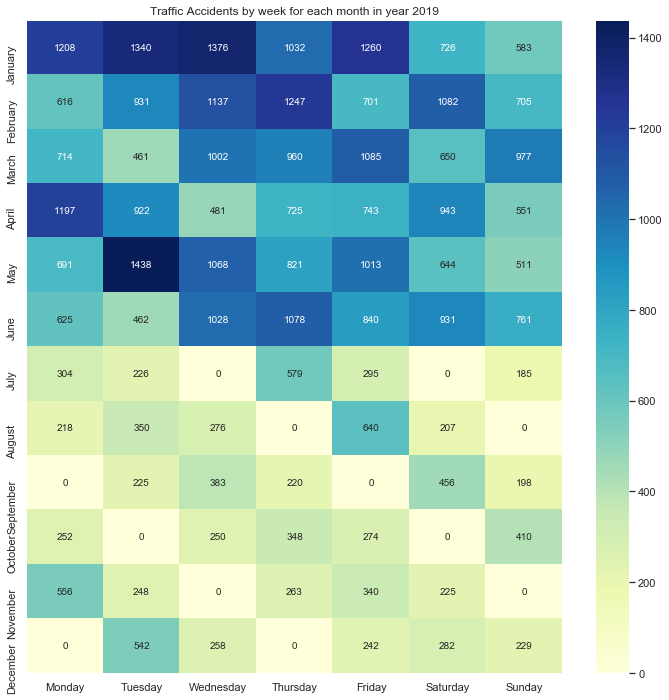

In [7]:
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='YlGnBu')
heatmap.set_title("Traffic Accidents by week for each month in year 2019")

# Now to determine the number of accidents by hour for each day in year 2019

### Function to store and return number of accidents by hour for each day

In [8]:
def accidents_daily(data, hour):
    hour_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in data.iterrows():
        if row["Hour"] == hour and row["Day of Week"] == "Monday": mon +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Tuesday": tues +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Wednesday": wed +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Thursday": thurs +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Friday": fri +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Saturday": sat +=1
        elif row["Hour"] == hour and row["Day of Week"] == "Sunday": sun +=1
        else: a=0 

    hour_list.append(mon)
    hour_list.append(tues)
    hour_list.append(wed)
    hour_list.append(thurs)
    hour_list.append(fri)
    hour_list.append(sat)
    hour_list.append(sun)
    
    return(hour_list)

## Creating heatmap matrix

In [9]:
hour_0 = accidents_daily(data, 0)
hour_1 = accidents_daily(data, 1)
hour_2 = accidents_daily(data, 2)
hour_3 = accidents_daily(data, 3)
hour_4 = accidents_daily(data, 4)
hour_5 = accidents_daily(data, 5)
hour_6 = accidents_daily(data, 6)
hour_7 = accidents_daily(data, 7)
hour_8 = accidents_daily(data, 8)
hour_9 = accidents_daily(data, 9)
hour_10 = accidents_daily(data, 10)
hour_11 = accidents_daily(data, 11)
hour_12 = accidents_daily(data, 12)
hour_13 = accidents_daily(data, 13)
hour_14 = accidents_daily(data, 14)
hour_15 = accidents_daily(data, 15)
hour_16 = accidents_daily(data, 16)
hour_17 = accidents_daily(data, 17)
hour_18 = accidents_daily(data, 18)
hour_19 = accidents_daily(data, 19)
hour_20 = accidents_daily(data, 20)
hour_21 = accidents_daily(data, 21)
hour_22 = accidents_daily(data, 22)
hour_23 = accidents_daily(data, 23)

#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
hour_array = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=hour_array, index=rows, columns=columns)

Text(0.5, 1.0, 'Traffic Accidents by hour for each day in 2019')

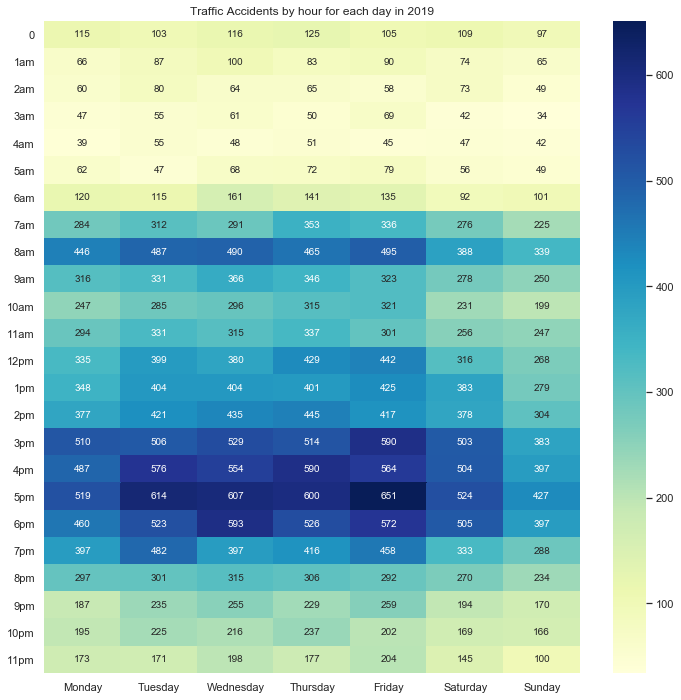

In [10]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour, annot=True, fmt="d", cmap='YlGnBu' )
ax.set_title("Traffic Accidents by hour for each day in 2019")